Initial Data Snapshot:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species        

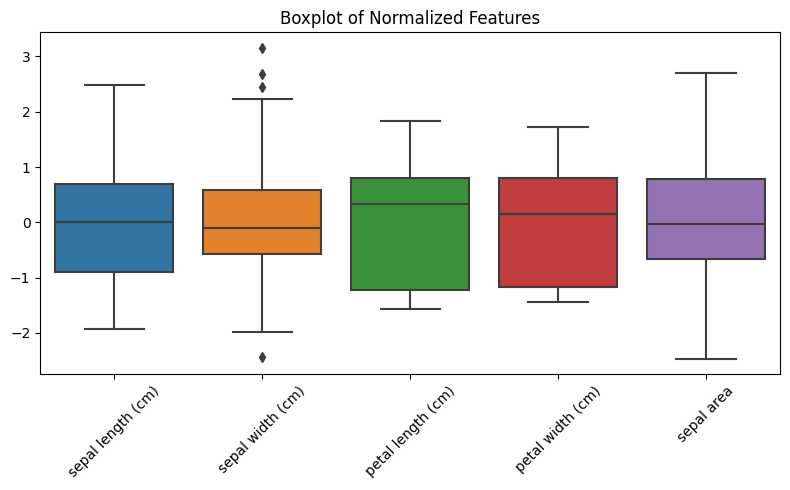

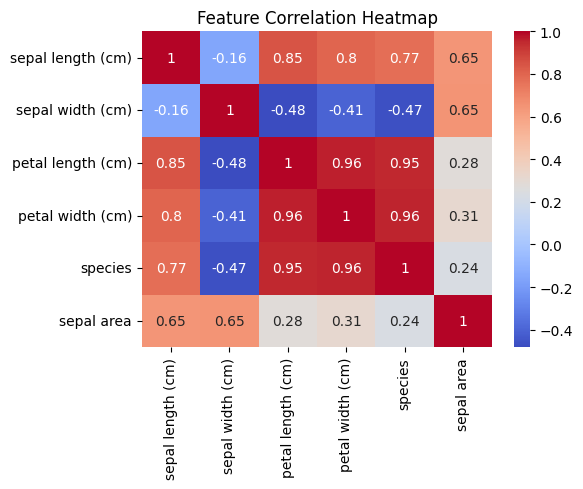


✅ Preprocessing Complete. Data saved to 'iris_preprocessed.csv'


In [1]:
# iris_preprocessing.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris

# 1. Load Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
print("Initial Data Snapshot:")
print(df.head())

# 2. Basic Info
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# 3. Introduce Some Missing Values (for demonstration purposes)
np.random.seed(42)
missing_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[missing_indices, 'sepal length (cm)'] = np.nan

# 4. Handle Missing Values
imputer = SimpleImputer(strategy='mean')
df['sepal length (cm)'] = imputer.fit_transform(df[['sepal length (cm)']])

# 5. Encode Categorical Variable (species is already numeric, but here's how to decode/encode if needed)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# 6. Feature Engineering (example: sepal area)
df['sepal area'] = df['sepal length (cm)'] * df['sepal width (cm)']

# 7. Outlier Detection & Removal using IQR
Q1 = df['sepal area'].quantile(0.25)
Q3 = df['sepal area'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['sepal area'] < (Q1 - 1.5 * IQR)) | (df['sepal area'] > (Q3 + 1.5 * IQR)))]

# 8. Normalize Numerical Features
scaler = StandardScaler()
numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal area']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 9. Visualizations
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Normalized Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# 10. Save the Preprocessed Data
df.to_csv('iris_preprocessed.csv', index=False)
print("\n✅ Preprocessing Complete. Data saved to 'iris_preprocessed.csv'")
